# Machine Learning Overview

## 11/4/2021
<a href="?print-pdf">print view</a>

In [11]:
%%html
<script src="http://bits.csb.pitt.edu/asker.js/lib/asker.js"></script>
<style>
.reveal .highlight pre { font-size: 100%}
.reveal .slides>section>section.present { max-height: 100%; overflow-y: auto;}
</style>

<script>
$3Dmolpromise = new Promise((resolve, reject) => { 
    require(['https://3dmol.org/build/3Dmol-nojquery.js'], function(){       
            resolve();});
});

require(['https://cdnjs.cloudflare.com/ajax/libs/Chart.js/2.2.2/Chart.js'], function(Ch){
 Chart = Ch;
});

$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');


//the callback is provided a canvas object and data 
var chartmaker = function(canvas, labels, data) {
  var ctx = $(canvas).get(0).getContext("2d");
     var dataset = {labels: labels,                     
    datasets:[{
     data: data,
     backgroundColor: "rgba(150,64,150,0.5)",
         fillColor: "rgba(150,64,150,0.8)",    
  }]};
  var myBarChart = new Chart(ctx,{type:'bar',data:dataset,options:{legend: {display:false},
        scales: {
            yAxes: [{
                ticks: {
                    min: 0,
                }
            }]}}});
};

$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>


# What is machine learning?

*Machine learning is a subfield of computer science that evolved from the study of pattern recognition and computational learning theory in artificial intelligence. Machine learning explores the study and construction of algorithms that can learn from and make predictions on data.* --Wikipedia

*Creating useful and/or predictive computational models from data* --dkoes

# Unsupervised Learning

Construct a model from unlabeled data.  That is, discover an underlying structure in the data.

We've done this!
 * Clustering
 * Principal Components Analysis (PCA)
 * UMAP
 
Also
 * Latent variable methods
 * Expectation-maximization
 * Self-organizing map

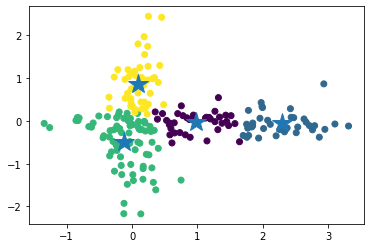

In [12]:
import numpy as np
import scipy.cluster.vq as vq #vq: vector quantization
import matplotlib.pylab as plt
%matplotlib inline
randpts = np.vstack((np.random.randn(100,2)/(4,1),(np.random.randn(100,2)+(1,0))/(1,4)))
(means,clusters) = vq.kmeans2(randpts,4)
plt.scatter(randpts[:,0],randpts[:,1],c=clusters)
plt.plot(means[:,0],means[:,1],'*',ms=20);

# Supervised Learning

Create a model from labeled data. The data consists of a set of *examples* where each example has a number of features *X* and a label *y*.

Our assumption is that the label is a function of the features:
$$y = f(X)$$  
And our goal is to determine what f is. 
We want a model/estimator/classifier that accurately predicts *y* given an _X_.
<div style="text-align: center; font-size: 150%">$X \rightarrow$<div style="display: inline-block; background-color: black; width: em; color: white; font-size: 120%; padding: 1em; font-weight: bold">Model</div>$ \rightarrow y$</div>


# Labels

There are two main types of supervised learning depending on the type of label.

## Classification

The label is one of a limited number of classes.
Most commonly it is a binary label.
 * Will it rain tomorrow?
 * Is the protein overexpressed?
 * Do the cells die?

## Regression

The label is a continuous value.
 * How much precipitation will there be tomorrow?
 * What is the expression level of the protein?
 * What percent of the cells died?

# Features

The features, *X*, are what make each example distinct.  Ideally they contain enough information to predict _y_.
The choice of features is critical and problem-specific.

There are three main three main types:
 * Binary - zero or one
 * Nominal - one of a limited number of values
   * low, medium, high
   * nucleus, vacuole, cytoplasm
 * Numerical
 
Not all classifiers can handle all three types, but we can inter-convert.

How?

# Example

Let's use chemical fingerprints as features!

In [19]:
!wget https://asinansaglam.github.io/python_bio_2022/files/er.smi

--2021-11-03 09:18:11--  https://asinansaglam.github.io/python_bio_2022/files/er.smi
Resolving mscbio2025.csb.pitt.edu (mscbio2025.csb.pitt.edu)... 136.142.4.139
Connecting to mscbio2025.csb.pitt.edu (mscbio2025.csb.pitt.edu)|136.142.4.139|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20022 (20K) [application/smil+xml]
Saving to: ‘er.smi’

er.smi              100%[===================>]  19.55K  --.-KB/s    in 0.001s  

2021-11-03 09:18:11 (35.2 MB/s) - ‘er.smi’ saved [20022/20022]



In [14]:
from openbabel import pybel
yvals = []
fps = []
for mol in pybel.readfile('smi','er.smi'):
    yvals.append(float(mol.title))
    fpbits = mol.calcfp().bits
    fp = np.zeros(1024)
    fp[fpbits] = 1
    fps.append(fp)
    
X = np.array(fps)
y = np.array(yvals)

In [15]:
X.shape

(387, 1024)

In [16]:
X[0]

array([0., 0., 0., ..., 0., 0., 0.])

The y-values, taken from the second column of the smiles file, are the logS solubility (I think).

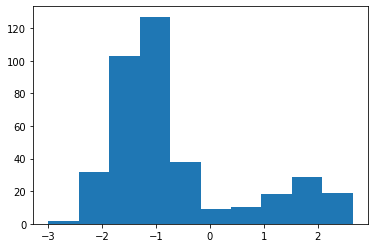

In [17]:
plt.hist(y);

In [18]:
%%html
<div id="classtype" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#classtype';
	jQuery(divid).asker({
	    id: divid,
	    question: "What sort of problem is this??",
        answers: ['Classification','Regression','Unsupervised'],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# `sklearn`

[scikit-learn](http://scikit-learn.org/stable/) provides a complete set machine learning tools.

* Classification
* Regression
* Clustering
* Dimensionality reduction
* Model selection and evaluation
* Preprocessing

In [20]:
import sklearn

# Linear Model

One of the simplest models is a linear regression, where the goal is to find weights *w* to minimize:
$$\sum(Xw - y)^2$$

<table>
<tr>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/400px-Linear_regression.svg.png"></td><td>
<img src="http://fab.cba.mit.edu/classes/864.11/people/Moritz_Kassner/img/blue_plane.png"></td></tr>
</table>

In [21]:
%%html
<div id="wshape" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#wshape';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is the shape of w?",
        answers: ['387','1024','(378,1024)','(1024,387)',"I've never taken matrix algebra"],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# Linear Model

`sklearn` has a uniform interface for all its models:

In [22]:
from sklearn import linear_model
model = linear_model.LinearRegression() # create the model
model.fit(X,y) # fit the model to the data
p = model.predict(X) # make predictions with the model

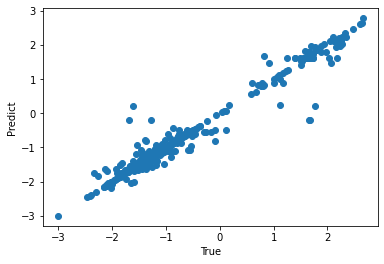

In [25]:
plt.scatter(y,p); plt.xlabel('True'); plt.ylabel('Predict');

Let's reframe this is a classification problem for illustrative purposes...

In [26]:
ylabel = y > -1
plabel = p > -1

# Evaluating Predictions

There are a number of ways to evaluate how good a prediction is.
 * *TP* true positive, a correctly predicted positive example
 * *TN*  true negatie, a correctly predicted negative example
 * *FP* false positive, a negative example incorrectly predicted as positive
 * *FN* false negative, a positive example incorrectly predicted as negative
 * *P* total number of positives (*TP* + *FN*)
 * *N* total number of negatives (*TN* + *FP*)

Accuracy: $\frac{TP+TN}{P+N}$

In [27]:
from sklearn.metrics import * #pull in accuracy score, amount other things
accuracy_score(ylabel, plabel)

0.9431524547803618

# Confusion matrix

The confusion matrix compares the predicted class to the actual class.

In [28]:
print(confusion_matrix(ylabel,plabel))

[[200  12]
 [ 10 165]]


This corresponds to:

In [29]:
print(np.array([['TN', 'FP'],['FN','TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


# Other measures

Precision. Of those predicted true, how may are accurate? $\frac{TP}{TP+FP}$

Recall (true positive rate). How many of the true examples were retrieved? $\frac{TP}{P}$

F1 Score. The geometric mean of precision and recall. $\frac{2TP}{2TP+FP+FN}$

In [30]:
print(classification_report(ylabel,plabel))

              precision    recall  f1-score   support

       False       0.95      0.94      0.95       212
        True       0.93      0.94      0.94       175

    accuracy                           0.94       387
   macro avg       0.94      0.94      0.94       387
weighted avg       0.94      0.94      0.94       387



In [31]:
%%html
<div id="confq" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#confq';
	jQuery(divid).asker({
	    id: divid,
	    question: "What would the recall be if our classifer predicted everything as true?",
        answers: ['0','81/306','0.5','1.0'],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# ROC Curves

The previous metrics work on classification results (yes or no).  Many models are capable of producing scores or probabilities (recall we had to threshold our results).  The classification performance then depends on what score threshold is chosen to distinguish the two classes.

ROC curves plot the false positive rate and true positive rate as this treshold is changed.

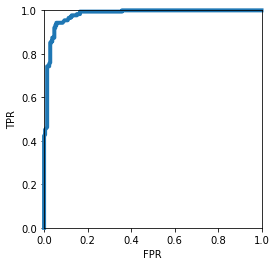

In [32]:
fpr, tpr, thresholds = roc_curve(ylabel, p)  #not using rounded values
plt.plot(fpr,tpr,linewidth=4,clip_on=False)
plt.xlabel("FPR"); plt.ylabel("TPR")
plt.gca().set_aspect('equal')
plt.ylim(0,1); plt.xlim(0,1); plt.show()

# AUC

The area under the ROC curve (AUC) has a statistical meaning. It is equal to the probability that the classifier will rank a randomly chosen positive example higher than a randomly chosen negative example.

An AUC of one is perfect prediction.

An AUC of 0.5 is the same as random.

0.5159029649595687


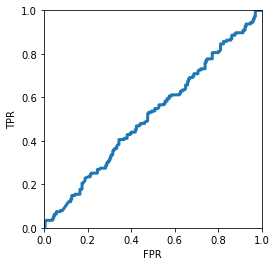

In [33]:
np.random.shuffle(p)
fpr, tpr, thresholds = roc_curve(ylabel, p)  
plt.plot(fpr,tpr,linewidth=3); plt.xlabel("FPR"); plt.ylabel("TPR"); plt.ylim(0,1); plt.xlim(0,1)
plt.gca().set_aspect('equal')

print(roc_auc_score(ylabel,p))

# Correct Model Evaluation

We are most interested in *generalization error*: the ability of the model to predict **new** data that was not part of the training set.

We have been evaluating how well our model can fit the training data.  This is usually irrelevant.

In order to assess the *predictiveness* of the model, we must use it to predict data it has not been trained on.

# Cross Validation

In cross validation we train on a portion of the data and test on the remainder.

### K-Fold Cross Validation
 * split data into *k* parts, or folds
 * train *k* models, each using a different set of k-1 folds
 * evaluate on held out set
 
 If k == n, called leave-one-out cross validation.
 
 <img width="600" src="http://i.stack.imgur.com/1fXzJ.png">

In [34]:
%%html
<div id="crossq" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#crossq';
	jQuery(divid).asker({
	    id: divid,
	    question: "In 5-fold cross validation, on average, how many times will a given example be in the training set?",
        answers: ['0','1','2.5','4','5'],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# Cross Validation

`sklearn` implement a number of cross validation variants.  They provide a way to generate test/train sets.

In [35]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
accuracies = []; rocs = []
for train,test in kf.split(X): # these are arrays of indices
    model = linear_model.LinearRegression() 
    model.fit(X[train],y[train]) #slice out the training folds
    p = model.predict(X[test]) #slice out the test fold
    accuracies.append(accuracy_score(ylabel[test],p > -1))
    fpr, tpr, thresholds = roc_curve(ylabel[test], p)  
    rocs.append( (fpr,tpr, roc_auc_score(ylabel[test], p)))

In [36]:
print(accuracies)
print("Average accuracy:",np.mean(accuracies))

[0.6794871794871795, 0.5384615384615384, 0.4935064935064935, 0.5584415584415584, 0.6103896103896104]
Average accuracy: 0.5760572760572761


In [37]:
np.count_nonzero(ylabel==0)/float(len(ylabel))

0.5478036175710594

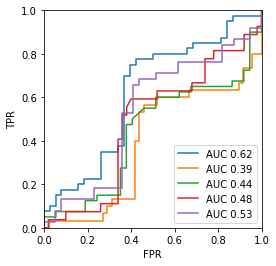

In [38]:
for roc in rocs:
    plt.plot(roc[0],roc[1],label="AUC %.2f" %roc[2]); 
plt.gca().set_aspect('equal')
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.ylim(0,1); plt.xlim(0,1); plt.legend(loc='best'); plt.show()

## Alternatively...

In [49]:
from sklearn.model_selection import cross_validate

cross_validate(linear_model.LinearRegression(),X,y > -1,cv=5,scoring=['roc_auc'])

{'fit_time': array([0.10693192, 0.14133501, 0.09526706, 0.10032511, 0.09746909]),
 'score_time': array([0.00554419, 0.01018572, 0.01348901, 0.00984788, 0.00208616]),
 'test_roc_auc': array([0.60723684, 0.39027778, 0.43851351, 0.63444444, 0.63022942])}

In [50]:
%%html
<div id="howgood" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#howgood';
	jQuery(divid).asker({
	    id: divid,
	    question: "How good is the predictiveness of our model?",
        answers: ['A','B','C','D'],
		extra: ['Still Perfect','Not perfect, but still good','Not great, but better than random','Horrible'],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# Generalization Error

There are several sources of generalization error:
 * overfitting - using artifacts of the data to make predictions
   * our data set has 387 examples and 1024 features
 * insufficient data - not enough or not the right kind
 * inappropriate model - isn't capable of representing reality
 
A large different between cross-validation performance and fit (test-on-train) performance indicates overfitting.

One way to reduce overfitting is to reduce the number of features used for training (this is called *feature selection*).

# LASSO

Lasso is a modified form of linear regression that includes a *regularization* parameter $\alpha$
$$\sum(Xw - y)^2 + \alpha\sum|w|$$

The higher the value of $\alpha$, the greater the penalty for having non-zero weights.  This has the effect of driving weights to zero and selecting fewer features for the model.


In [51]:
kf = KFold(n_splits=5)
accuracies = []; rocs = []
for train,test in kf.split(X): # these are arrays of indices
    model = linear_model.Lasso(alpha=0.005) 
    model.fit(X[train],y[train]) #slice out the training folds
    p = model.predict(X[test]) #slice out the test fold
    accuracies.append(accuracy_score(ylabel[test],p > 0))
    fpr, tpr, thresholds = roc_curve(ylabel[test], p)  
    rocs.append( (fpr,tpr, roc_auc_score(ylabel[test],p)))

In [52]:
print(accuracies)
print("Average accuracy:",np.mean(accuracies))

[0.6666666666666666, 0.7948717948717948, 0.6493506493506493, 0.8051948051948052, 0.7402597402597403]
Average accuracy: 0.7312687312687312


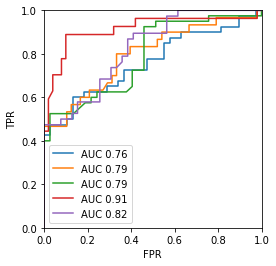

In [53]:
for roc in rocs:
    plt.plot(roc[0],roc[1],label="AUC %.2f" %roc[2]); 
plt.gca().set_aspect('equal')    
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.ylim(0,1); plt.xlim(0,1); plt.legend(loc='best'); plt.show()

# Lasso vs. LinearRegression

In [54]:
linmodel = linear_model.LinearRegression() 
linmodel.fit(X,y) 
lassomodel = linear_model.Lasso(alpha=0.005) 
lassomodel.fit(X,y);

The Lasso model is much simpler

In [55]:
print("Nonzero coefficients in linear:",np.count_nonzero(linmodel.coef_))
print("Nonzero coefficients in LASSO:",np.count_nonzero(lassomodel.coef_))

Nonzero coefficients in linear: 881
Nonzero coefficients in LASSO: 64


# Model Parameter Optimization

Most classifiers have parameters, like $\alpha$ in Lasso, that can be set to change the classification behavior.

A key part of training a model is figuring out what parameters to use.

This is typically done by a brute-force grid search (i.e., try a bunch of values and see which ones work)

In [56]:
from sklearn import model_selection
#setup grid search with default 5-fold CV and scoring
searcher = model_selection.GridSearchCV(linear_model.Lasso(max_iter=10000), {'alpha': [0.001,0.005,0.01,0.1]})
searcher.fit(X,y)
searcher.best_params_

{'alpha': 0.005}

# Model specific optimization

Some classifiers (mostly linear models) can identify optimal parameters more efficiently and have a "CV" version that automatically determines the best parameters.

In [57]:
lassomodel = linear_model.LassoCV(n_jobs=8,max_iter=10000)
lassomodel.fit(X,y)

LassoCV(max_iter=10000, n_jobs=8)

In [58]:
lassomodel.alpha_

0.00455203947849711

# Support Vector Machine (SVM)

A support vector machine is orthogonal to a linear model - it attempts to find a plane that *separates* the classes of data with the maximum *margin*.

<img  src="http://docs.opencv.org/2.4/_images/optimal-hyperplane.png">

There are two key parameters in an SVM: the kernel and the penalty term (and some kernels may have additional parameters).

# SVM Kernels

A kernel function, $\phi$, is a transformation of the input data that let's us apply SVM (linear separation) to problems that are not linearly separable.

<img src="http://upload.wikimedia.org/wikipedia/commons/1/1b/Kernel_Machine.png">

<img src="https://scikit-learn.org/0.18/_images/sphx_glr_plot_iris_001.png">

# Training SVM

We can get both the *predictions* (0 or 1) from the SVM as well as *probabilities*, a confidence in how accurate the predictions are.  We use the probabilities to compute the ROC curve.

In [59]:
from sklearn import svm
kf = KFold(n_splits=5)
accuracies = []; rocs = []
for train,test in kf.split(X): # these are arrays of indices
    model = svm.SVC(probability=True) 
    model.fit(X[train],ylabel[train]) #slice out the training folds
    p = model.predict(X[test]) # prediction (0 or 1)
    probs = model.predict_proba(X[test])[:,1] #probability of being 1
    accuracies.append(accuracy_score(ylabel[test],p))
    fpr, tpr, thresholds = roc_curve(ylabel[test], probs)  
    rocs.append( (fpr,tpr, roc_auc_score(ylabel[test],probs)))

# Training SVM

In [60]:
print(accuracies)
print("Average accuracy:",np.mean(accuracies))

[0.6923076923076923, 0.7307692307692307, 0.6883116883116883, 0.7922077922077922, 0.6753246753246753]
Average accuracy: 0.7157842157842158


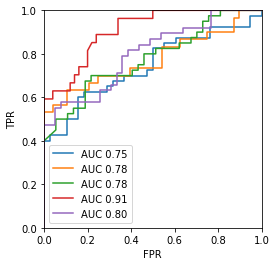

In [61]:
for roc in rocs:
    plt.plot(roc[0],roc[1],label="AUC %.2f" %roc[2]); 
plt.gca().set_aspect('equal')
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.ylim(0,1); plt.xlim(0,1); plt.legend(loc='best'); plt.show()

# Training SVM

In [62]:
from sklearn import model_selection
searcher = model_selection.GridSearchCV(svm.SVC(), {'kernel': ['linear','rbf'],'C': [1,10,100,1000]},scoring='roc_auc',n_jobs=-1)
searcher.fit(X,ylabel)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf']},
             scoring='roc_auc')

In [63]:
print("Best AUC:",searcher.best_score_)
print("Parameters",searcher.best_params_)

Best AUC: 0.8149612403100776
Parameters {'C': 10, 'kernel': 'rbf'}


# Nearest Neighbors (NN)

Nearest Neighbors models classify new points based on the values of the closest points in the training set.

<img width="400" src="http://scikit-learn.org/stable/_images/sphx_glr_plot_classification_001.png">

The main parameter is $k$, the number of neighbors to consider, and the method of combining the neighbor results.

# Training NN

In [64]:
from sklearn import neighbors
kf = KFold(n_splits=5)
accuracies = []; rocs = []
for train,test in kf.split(X): # these are arrays of indices
    model = neighbors.KNeighborsClassifier() # defaults to k=5
    model.fit(X[train],ylabel[train]) #slice out the training folds
    p = model.predict(X[test]) # prediction (0 or 1)
    probs = model.predict_proba(X[test])[:,1] #probability of being 1
    accuracies.append(accuracy_score(ylabel[test],p))
    fpr, tpr, thresholds = roc_curve(ylabel[test], probs)  
    rocs.append( (fpr,tpr, roc_auc_score(ylabel[test],probs)))

# Training NN

In [65]:
print(accuracies)
print("Average accuracy:",np.mean(accuracies))

[0.7307692307692307, 0.6923076923076923, 0.7272727272727273, 0.7272727272727273, 0.7662337662337663]
Average accuracy: 0.7287712287712288


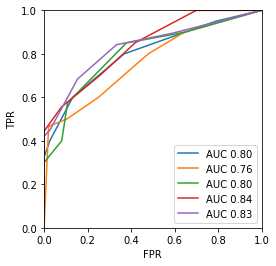

In [66]:
for roc in rocs:
    plt.plot(roc[0],roc[1],label="AUC %.2f" %roc[2]); 
plt.gca().set_aspect('equal')    
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.ylim(0,1); plt.xlim(0,1); plt.legend(loc='best'); plt.show()

In [68]:
%%html
<div id="knnq" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#knnq';
	jQuery(divid).asker({
	    id: divid,
	    question: "What could <b>not</b> be a valid probability from the previous k-nn (k=5) model?",
        answers: ['0','.5','.6','1'],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# Training NN

In [69]:
searcher = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(), \
                {'n_neighbors': [1,2,3,4,5,10]},scoring='roc_auc',n_jobs=-1)
searcher.fit(X,ylabel);

In [70]:
print("Best AUC:",searcher.best_score_)
print("Parameters",searcher.best_params_)

Best AUC: 0.8039629805410536
Parameters {'n_neighbors': 5}


# Decision Trees

A decision tree is a tree where each node make a decision based on the value of a single feature.  At the bottom of the tree is the classification that results from all those decisions.

<img width="500px" src="http://www.massgenomics.org/wp-content/uploads/2008/10/decision_tree_model.png">

Significant model parameters include the depth of the tree and how features and splits are determined.

In [71]:
%%html
<div id="dtqml" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#dtqml';
	jQuery(divid).asker({
	    id: divid,
	    question: "Humidity is low, it's windy, and it is sunny. What do you do?",
		answers: ["Play","Don't Play"],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();
</script>

# Random Forest

A bunch of decision trees trained on different sub-samples of the data.

They vote (or are averaged).

# Training a Decision Tree

In [72]:
from sklearn import tree
kf = KFold(n_splits=5)
accuracies = []; rocs = []
for train,test in kf.split(X): # these are arrays of indices
    model = tree.DecisionTreeClassifier() 
    model.fit(X[train],ylabel[train]) #slice out the training folds
    p = model.predict(X[test]) # prediction (0 or 1)
    probs = model.predict_proba(X[test])[:,1] #probability of being 1
    accuracies.append(accuracy_score(ylabel[test],p))
    fpr, tpr, thresholds = roc_curve(ylabel[test], probs)  
    rocs.append( (fpr,tpr, roc_auc_score(ylabel[test],probs)))

# Training a Decision Tree

In [73]:
print(accuracies)
print("Average accuracy:",np.mean(accuracies))

[0.7692307692307693, 0.717948717948718, 0.6883116883116883, 0.7402597402597403, 0.7402597402597403]
Average accuracy: 0.7312021312021312


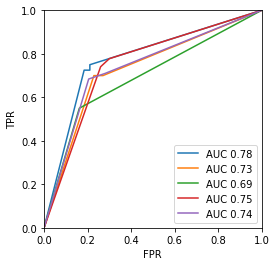

In [74]:
for roc in rocs:
    plt.plot(roc[0],roc[1],label="AUC %.2f" %roc[2]); 
plt.gca().set_aspect('equal')    
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.ylim(0,1); plt.xlim(0,1); plt.legend(loc='best'); plt.show()

In [75]:
set(probs)

{0.0, 0.5, 1.0}

# Training a Decision Tree

In [76]:
searcher = model_selection.GridSearchCV(tree.DecisionTreeClassifier(),  \
                {'max_depth': [1,2,3,4,5,10]},scoring='roc_auc',n_jobs=-1)
searcher.fit(X,ylabel);

In [77]:
print("Best AUC:",searcher.best_score_)
print("Parameters",searcher.best_params_)

Best AUC: 0.7670779939882931
Parameters {'max_depth': 5}


In [83]:
model = tree.DecisionTreeClassifier(max_depth=5).fit(X,ylabel)
set(model.predict_proba(X)[:,1])

{0.0,
 0.046153846153846156,
 0.15217391304347827,
 0.2391304347826087,
 0.5,
 0.6666666666666666,
 1.0}

# Regression

Regression in `sklearn` is pretty much the same as classification, but you use a score appropriate for regression (e.g., squared error or correlation).

# Key Points

 * **Must cross-validate** or otherwise evaluate model on unseen data
 * Need to parameterize model
 * Once parameterized, train on full dataset
 
### Which method works best?

The one that provides the best predictive power with your data.

# Project

Pick a model and train it to predict the actual y values (regression) of our er.smi dataset.

In [ ]:
!wget https://asinansaglam.github.io/python_bio_2022/files/er.smi

from openbabel import pybel
yvals = []
fps = []
for mol in pybel.readfile('smi','er.smi'):
    yvals.append(float(mol.title))
    fpbits = mol.calcfp().bits
    fp = np.zeros(1024)
    fp[fpbits] = 1
    fps.append(fp)
    
X = np.array(fps)
y = np.array(yvals)

In [87]:
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn import ensemble
kf = KFold(n_splits=5)
errors = []
predictions = []
for train,test in kf.split(X): # these are arrays of indices
    model = sklearn.ensemble.RandomForestRegressor() 
    model.fit(X[train],y[train]) #slice out the training folds
    p = model.predict(X[test]) # prediction (0 or 1)
    predictions += zip(y[test],p)
    errors.append(mean_squared_error(y[test],p))
predictions = np.array(predictions)

--2021-11-03 11:13:27--  https://asinansaglam.github.io/python_bio_2022/files/er.smi
Resolving mscbio2025.csb.pitt.edu (mscbio2025.csb.pitt.edu)... 136.142.4.139
Connecting to mscbio2025.csb.pitt.edu (mscbio2025.csb.pitt.edu)|136.142.4.139|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20022 (20K) [application/smil+xml]
Saving to: ‘er.smi.2’

er.smi.2            100%[===================>]  19.55K  --.-KB/s    in 0.001s  

2021-11-03 11:13:27 (37.5 MB/s) - ‘er.smi.2’ saved [20022/20022]



In [85]:
print(errors)
print("Average squared error",np.mean(errors))

[0.29409426131815575, 0.3725477330795315, 0.19486106838189757, 0.37289075403267813, 0.20452413132812097]
Average squared error 0.2877835896280768


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.9025381312047994

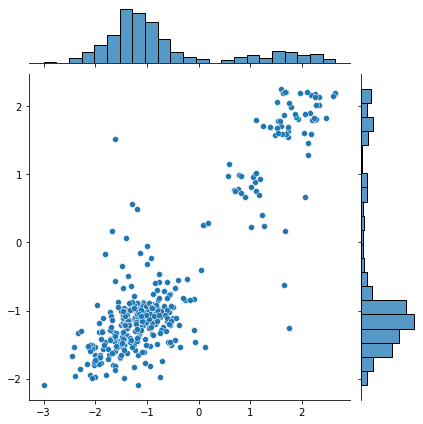

In [86]:
import seaborn as sns
sns.jointplot(predictions[:,0],predictions[:,1])
plt.xlabel("Experiment"); plt.ylabel("Predicted")
np.corrcoef(predictions[:,0],predictions[:,1])[0][1]